# Building your first model: naive Bayes

## Challenge: Feedback analysis 
by: Melissa N 

Data: [dataset of sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#)

Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## AMAZON CLASSIFIER

The data is a text file that contains review that were taken Amazon. In it we have the customer comment or review on the product they purchased. And also their grade of  say product, which is either 1 for good (liked product) or 0 for bad (disliked product). 

In [2]:
# Grab and process the raw data for amazon.
data_1 = open("amazon_cells_labelled.txt")

df_a = pd.read_csv(data_1, delimiter= '\t', header=None)
df_a.columns = ['review', 'sentiment']



In [3]:
display(df_a.head())

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Let's Find the Good review meaning the ones with sentiment = 1.    
This mean we will create a file for our model that will contain some words that we believe are usually found in good reviews.

In [4]:
keywords_a = ['great', 'good', 'excellent', 'awesome', 'recommend', 'fast', 'love', 'nice','well','ideal','highly','must have','love','beautiful','super' ]

for key in keywords_a:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_a[str(key)] = df_a.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
keywords_a

['great',
 'good',
 'excellent',
 'awesome',
 'recommend',
 'fast',
 'love',
 'nice',
 'well',
 'ideal',
 'highly',
 'must have',
 'love',
 'beautiful',
 'super']

In [6]:
display(df_a.head())

,review,sentiment,great,good,excellent,awesome,recommend,fast,love,nice,well,ideal,highly,must have,beautiful,super
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Here we are going through the data, mostly the sentiment column and identify the columns that have a good sentiment.  
Meaning that the customer gave it a score of 1. 

In [7]:
df_a['sentiment'] = (df_a['sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [8]:
display(df_a.head())

,review,sentiment,great,good,excellent,awesome,recommend,fast,love,nice,well,ideal,highly,must have,beautiful,super
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


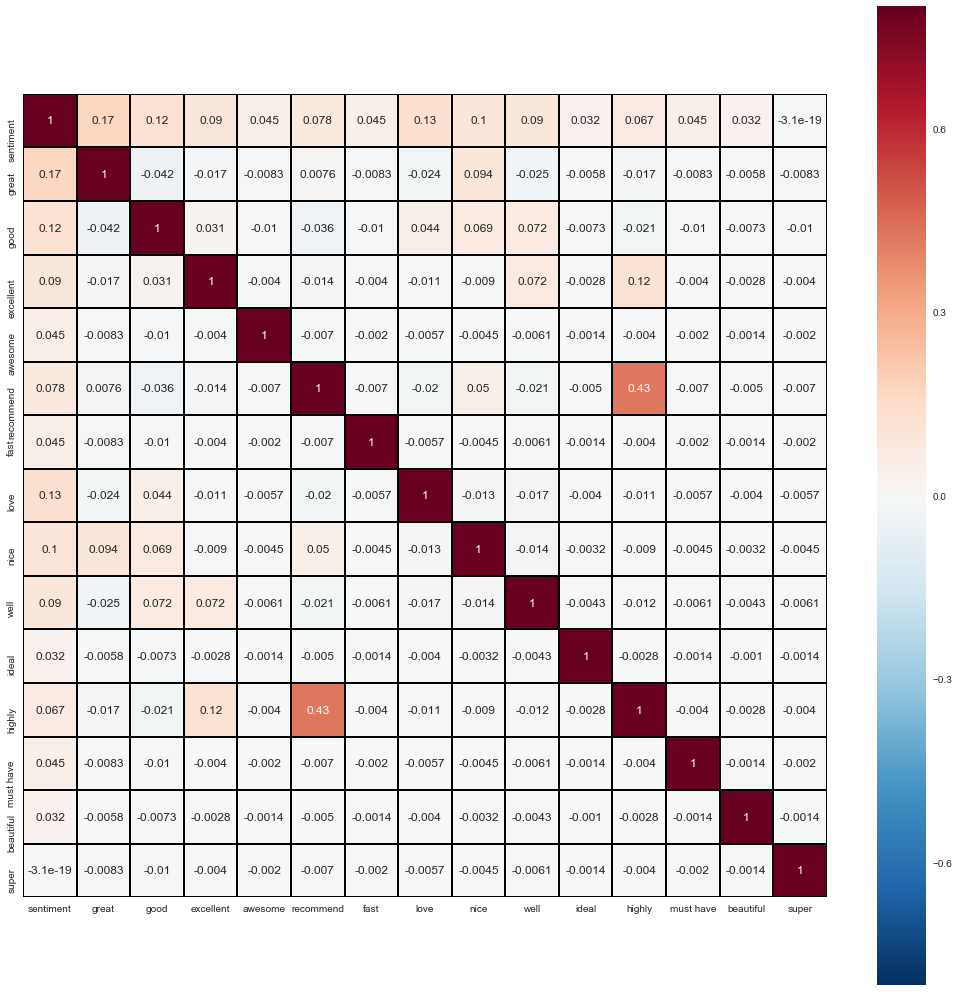

In [9]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_a.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

Looking at the correlation matrix,   
 

We see that the correlation between "highly" and "recommend" is 0.43. This mean that in many of the reviews that have recommend, they also for the most part contain the term highly. This makes sense since people will usually write that they "highly recommed" a produt if they like it. 


We see that the correlation between "highly" and "excellent" is 0.12. This mean that in many of the reviews that the word "highly" in it, we can also find the word "excellent".

This is why at the end we will remove "Highly". 

We see that the correlation between sentiment and "super" is -3.1e-19. This is so small that is not a correlation.   

This is why at the end we will remove "Super".


The features with a high correlation with the outcome were "great", "love", "good" and "nice".  
If we see a review with those words in it, there is high likely hood that the review is a good review.  

In [10]:
data = df_a[keywords_a]
target = df_a['sentiment']

In [11]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 391


In [12]:

# Calculating accuracy
(target == y_pred).sum() / data.shape[0] * 100

60.899999999999999

60.89% off of 609 correctly classified messages and 391 incorrectly classified.

In [13]:

# importing confusion matrix to see where we were right and where we were wrong
from sklearn.metrics import confusion_matrix
C = confusion_matrix(target, y_pred)
display(C)


array([[477,  23],
       [368, 132]])


__true negatives__ is C_{0,0} = 477         
This means that 477 were accuratly identified has not being good sentiments or reviews.      

__false negatives__ is C_{1,0} = 368          
This means that 368 were identified has not being good sentiments or reviews when they were not good reviews.   
Those are called a Type II error or a miss.    

__true positives__ is C_{1,1} = 132    
This mean that 132 were identified has being good sentiments or reviews and they are.       


__false positives__ is C_{0,1} = 23    
This means that 23 were identified has good sentiments or reviews when they were not good reviews.    
Those are called a Type I error or a false alarm.    

In [14]:
from sklearn.metrics import classification_report
print(classification_report(target, y_pred))

             precision    recall  f1-score   support

      False       0.56      0.95      0.71       500
       True       0.85      0.26      0.40       500

avg / total       0.71      0.61      0.56      1000



For our model:

__Sensitivity__ is the percentage of positives correctly identified, in our case 132/500 or 26%.    
Our model is not as good as we would like it to be to identified good reviews.   

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 477/500 or 95%.    
Our model is very good at identified the bad reviews.   

## YELP CLASSIFIER

The data is a text file that contains review that were taken from Yelp. It seems to be mostly the reviews of the service at a restaurant. In it we have the customer comment or review on the service they received at say restaurant. And also their grade of the service they recieve, which is either 1 for good (liked service) or 0 for bad (disliked service). 

In [15]:
# Grab and process the raw data for Yelp.
data_2 = open("yelp_labelled.txt")

df_y = pd.read_csv(data_2, delimiter= '\t', header=None)
df_y.columns = ['review', 'sentiment']



In [16]:
display(df_y.head())

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Let's Find the Bad reviews meaning the ones with sentiment = 0   
This is because the model we create for amazon seem to be good at identifying bad reviews.
So here, we will create a file for our model that will contain some words that we believe  are usually found in good reviews.

In [17]:
keywords_y = ['worst', 'bad', 'horrible', 'disgusted', 'awful', 'bland','slow', 'hated', 'did not like','never','bland','never','worst','poor','drag','frozen' ]

for key in keywords_y:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_y[str(key)] = df_y.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [18]:
keywords_y

['worst',
 'bad',
 'horrible',
 'disgusted',
 'awful',
 'bland',
 'slow',
 'hated',
 'did not like',
 'never',
 'bland',
 'never',
 'worst',
 'poor',
 'drag',
 'frozen']

In [19]:
df_y['sentiment'] = (df_y['sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [20]:
display(df_y.head())

,review,sentiment,worst,bad,horrible,disgusted,awful,bland,slow,hated,did not like,never,poor,drag,frozen
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False,False,False,False,False,False


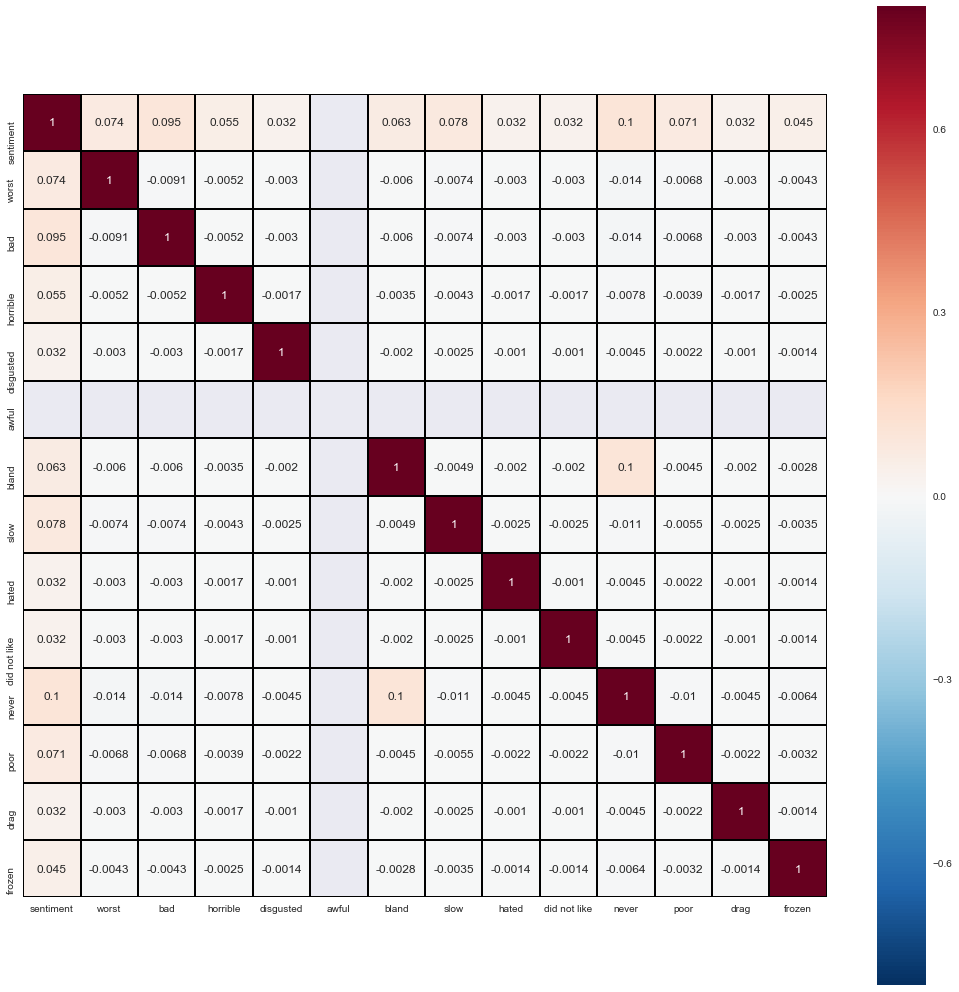

In [21]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_y.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

Looking at the correlation matrix,   

During our iteration, we see that the feature "awful" does not have a value. This means that it is not in any of the reviews. 
Thus shuld be removed as a feature. 
 
During our iteration, we had the feature "bland" in but 

We see that the correlation between "bland" and "never" is 0.1. This mean that in many of the reviews that have "bland", they also for the most part contain the term "never".   


We see that the correlation between sentiment and "bland" is 0.063.    

We see that the correlation between sentiment and "never" is 0.1.    

This is why at the end we will remove "bland". 


The features with a high correlation with the outcome were "never", "bad", "slow", "worst", "poor" and "nice".  
If we see a review with those words in it, there is high likelyhood that the review is a bad review.  

In [22]:
data = df_y[keywords_y]
target = df_y['sentiment']

In [23]:


# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 447


In [24]:
# Calculating accuracy
(target == y_pred).sum() / data.shape[0] * 100

55.300000000000004

55.30% off of 496 correctly classified messages and 447 incorrectly classified.

In [25]:
# importing confusion matrix to see where we were right and where we were wrong
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[496,   4],
       [443,  57]])


__true negatives__ is C_{0,0} = 496         
This means that 496 were accuratly identified has not being bad sentiments or reviews.      

__false negatives__ is C_{1,0} = 443          
This means that 443 were identified has not being bad sentiments or reviews when they were not bad reviews.   
Those are called a Type II error or a miss.    

__true positives__ is C_{1,1} = 57    
This mean that 57 were identified has being bad sentiments or reviews and they are.       


__false positives__ is C_{0,1} = 4    
This means that 4 were identified has bad sentiments or reviews when they were not bad reviews.    
Those are called a Type I error or a false alarm.    

In [26]:
from sklearn.metrics import classification_report
print(classification_report(target, y_pred))

             precision    recall  f1-score   support

      False       0.53      0.99      0.69       500
       True       0.93      0.11      0.20       500

avg / total       0.73      0.55      0.45      1000



For our model:

__Sensitivity__ is the percentage of positives correctly identified, in our case 57/500 or 11%.    
Our model is not as good as we would like it to be to identified bad reviews.   

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 443/500 or 99%.
Our model is very good at identified the good reviews.   

## YELP CLASSIFIER With Amazon model 

In [27]:
# Grab and process the raw data for Yelp.
data_2 = open("yelp_labelled.txt")

df_y1 = pd.read_csv(data_2, delimiter= '\t', header=None)
df_y1.columns = ['review', 'sentiment']

In [28]:
#keywords_a = ['great', 'good', 'excellent', 'awesome', 'recommend', 'fast', 'love', 'nice' ]

for key in keywords_a:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_y1[str(key)] = df_y1.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [29]:
display(df_y1.head())

,review,sentiment,great,good,excellent,awesome,recommend,fast,love,nice,well,ideal,highly,must have,beautiful,super
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
df_y1['sentiment'] = (df_y1['sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [31]:
display(df_y1.head())

,review,sentiment,great,good,excellent,awesome,recommend,fast,love,nice,well,ideal,highly,must have,beautiful,super
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


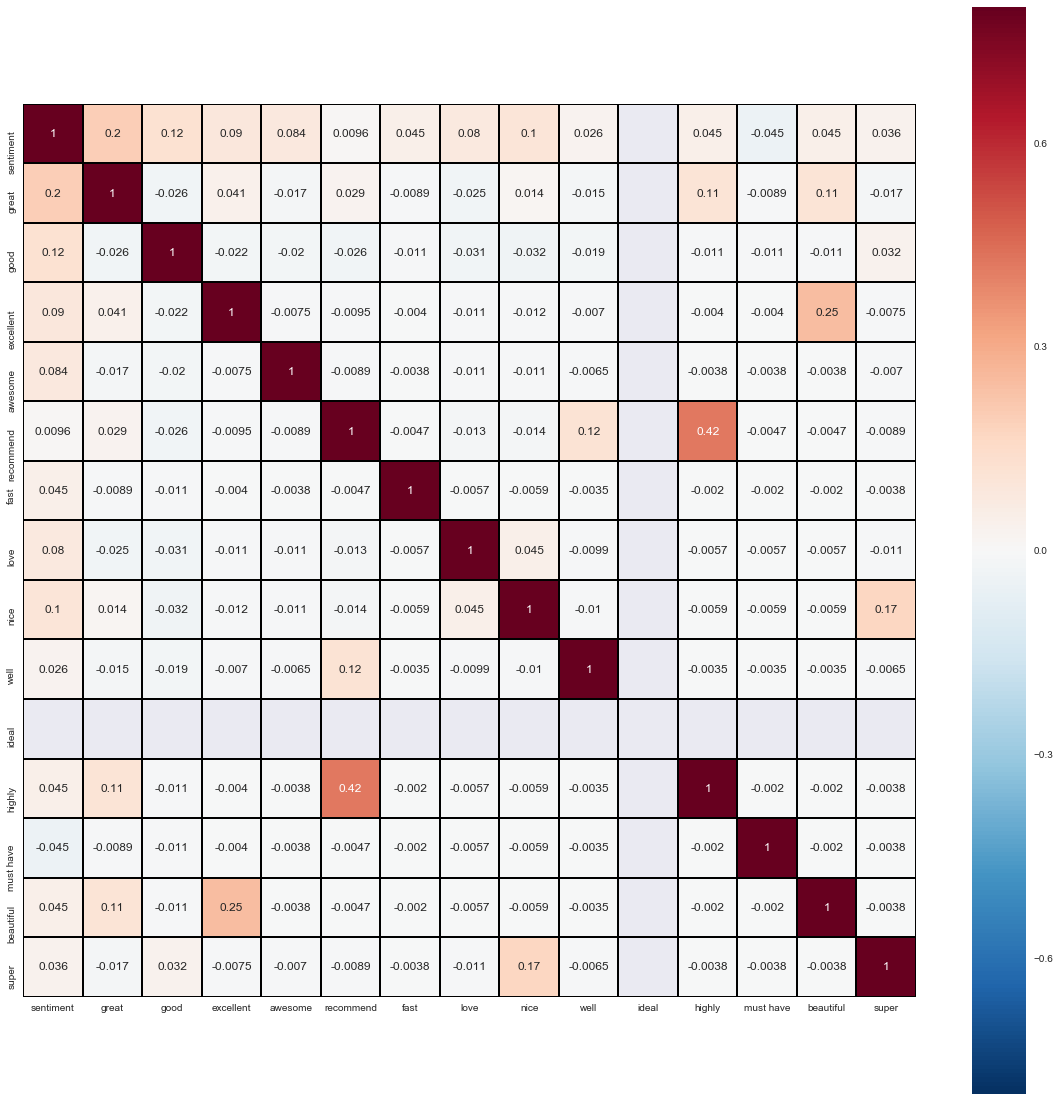

In [32]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_y1.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

Looking at the correlation matrix,   
 
 
During our iteration, we see that the feature "ideal" does not have a value. This means that it is not in any of the reviews. 
Thus should be removed as a feature.  


We see that the correlation between "highly" and "recommend" is 0.42. 

We see that the correlation between "highly" and "excellent" is 0.041. 

We see that the correlation between "highly" and "great" is 0.11. 

While the the correlation between "highly" and the "sentiment" is 0.045. 

This is why at the end we will remove "Highly".    



We see that the correlation between "nice" and "super" is 0.17.    

While the the correlation between "super" and the "sentiment" is 0.036. 

This is why at the end we will remove "Super".   


We see that the correlation between "beautiful" and "great" is 0.11. 

We see that the correlation between "beautiful" and "excellent" is 0.25.   

While the the correlation between "beautiful" and the "sentiment" is 0.045. 

This is why at the end we will remove "beautiful".  


The features with a high correlation with the outcome were "great", "love", "good" and "nice".  
If we see a review with those words in it, there is high likely hood that the review is a good review.

In [33]:
data = df_y1[keywords_a]
target = df_y1['sentiment']

In [34]:


# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 392


In [35]:

# Calculating accuracy
(target == y_pred).sum() / data.shape[0] * 100

60.799999999999997

60.79% off of 608 correctly classified messages and 392 incorrectly classified.

In [36]:
# importing confusion matrix to see where we were right and where we were wrong
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[478,  22],
       [370, 130]])


__true negatives__ is C_{0,0} = 478         
This means that 478 were accuratly identified has not being good sentiments or reviews.      

__false negatives__ is C_{1,0} = 370          
This means that 370 were identified has not being good sentiments or reviews when they were not good reviews.   
Those are called a Type II error or a miss.    

__true positives__ is C_{1,1} = 130    
This mean that 130 were identified has being good sentiments or reviews and they are.       


__false positives__ is C_{0,1} = 22    
This means that 22 were identified has good sentiments or reviews when they were not good reviews.    
Those are called a Type I error or a false alarm.     

In [37]:
from sklearn.metrics import classification_report
print(classification_report(target, y_pred))

             precision    recall  f1-score   support

      False       0.56      0.96      0.71       500
       True       0.86      0.26      0.40       500

avg / total       0.71      0.61      0.55      1000



For our model:

__Sensitivity__ is the percentage of positives correctly identified, in our case 130/500 or 26%.    
Our model is not as good as we would like it to be to identified good reviews.   

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 478/500 or 96%.
Our model is very good at identified the bad reviews.   